In [1]:
if __name__=='__main__':
    %load_ext autoreload
    %autoreload 2
    
    import notebookimport
    
    sr = __import__("Charts - Stage Results")


importing Jupyter notebook from Charts - Stage Results.ipynb


In [ ]:
# TO DO
# do a step line chart for relative / rebased positions ahead / behind

In [2]:
#TO DO: need a filter for particular day
#eg day 1, day 2.

In [3]:
import pandas as pd

from IPython.display import HTML

import dakar_utils as dakar
from dakar_utils import moveColumn, sparkline2, sparklineStep, moreStyleDriverSplitReportBaseDataframe


In [4]:
import sqlite3

dbname='dakar_sql.sqlite'

conn = sqlite3.connect(dbname)

c = conn.cursor()


In [5]:
dbname2='sweden19.db'
conn2 = sqlite3.connect(dbname2)

c2 = conn2.cursor()


In [6]:
from IPython.display import HTML

In [7]:
def _rebaseTimes(times, bib=None):
    if bib is None: return times
    return times - times.loc[bib]

In [8]:
REBASER=306

In [9]:
q= 'SELECT entryId, `driver.code` AS Code FROM startlists'
codes = pd.read_sql(q,conn2).set_index('entryId')
codes.head()

,Code
entryId,
3526,OGI
3527,SUN
3528,LAP
3529,MEE
3530,TID


In [10]:
#For WRC
rc='RC1'
rally='Sweden'
typ='overall'
wREBASE='MIK'

def gapToLeaderBar(conn, rally, rc, typ):
    Xtmpq = sr.dbGetStageRank(conn, rally, rc, typ)#.head()
    Xtmpq = Xtmpq[['entryId','snum', 'diffFirstMs']].pivot(index='entryId',columns='snum',values='diffFirstMs')
    Xtmpq = Xtmpq/1000
    if typ=='stage':
        Xtmpq.columns = ['SS_{}'.format(c) for c in Xtmpq.columns]
    else:
        Xtmpq.columns = ['SS_{}_{}'.format(c, typ) for c in Xtmpq.columns]
    k = '{}GapToLeader'.format(typ)
    Xtmpq[k]= Xtmpq[[c for c in Xtmpq.columns ]].values.tolist()
    Xtmpq[k] = Xtmpq[k].apply(lambda x: [-y for y in x])
    Xtmpq[k] = Xtmpq[k].apply(sparkline2, typ='bar', dot=True)
    return Xtmpq 


wrc = pd.merge(codes,gapToLeaderBar(conn2, rally, rc, 'overall'), left_index=True, right_index=True)

wrc =  pd.merge(wrc,gapToLeaderBar(conn2, rally, rc, 'stage'), left_index=True, right_index=True)

wrc.head(10)

,Code,SS_1_overall,SS_2_overall,SS_3_overall,SS_4_overall,SS_5_overall,SS_6_overall,SS_7_overall,SS_8_overall,SS_9_overall,...,SS_8,SS_9,SS_10,SS_11,SS_12,SS_13,SS_14,SS_15,SS_16,stageGapToLeader
entryId,,,,,,,,,,,,,,,,,,,,,
3526,OGI,0.8,3.0,9.4,14.4,33.6,451.8,866.7,1272.8,1271.4,...,420.3,5.8,0.0,0.0,9.0,9.1,0.0,NaN,NaN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3527,SUN,2.7,4.6,3.5,5.5,1.8,0.0,0.0,0.0,1.8,...,14.2,9.0,89.0,2.4,5.0,10.2,42.3,NaN,NaN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3528,LAP,3.0,9.0,12.5,14.8,41.4,50.1,55.9,42.0,47.3,...,0.3,12.5,9.2,5.4,2.1,3.8,2.2,NaN,NaN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3529,MEE,4.4,10.7,21.6,29.8,31.8,38.9,53.0,53.1,55.2,...,14.3,9.3,7.3,5.4,12.0,19.9,9.0,NaN,NaN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3530,TID,4.8,25.8,48.6,66.5,66.5,77.3,85.3,84.4,105.4,...,13.3,28.2,32.1,10.0,20.3,21.8,7.9,NaN,NaN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3531,TÄN,1.9,0.0,0.0,0.0,3.7,8.0,13.0,2.0,0.0,...,3.2,5.2,1.9,7.2,0.0,0.0,4.7,NaN,NaN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3532,LAT,2.0,4.1,5.4,5.6,0.0,5.7,5.0,591.1,583.9,...,600.3,0.0,8.4,7.1,17.2,19.0,263.8,NaN,NaN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3533,NEU,0.0,3.8,4.2,6.0,33.3,45.1,54.8,52.7,55.4,...,12.1,9.9,5.4,0.1,7.7,2.4,1.6,NaN,NaN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3534,LOE,6.0,22.1,35.1,43.5,48.8,52.2,51.5,48.8,58.4,...,11.5,16.8,19.7,6.1,14.7,7.4,3.0,NaN,NaN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


In [11]:
def positionStep(conn, rally, rc, typ):
    Xtmpq = sr.dbGetStageRank(conn, rally, rc, typ)#.head()
    Xtmpq = Xtmpq[['entryId','snum', 'position']].pivot(index='entryId',columns='snum',values='position')
    Xtmpq.columns = ['SS_{}_{}_pos'.format(c, typ) for c in Xtmpq.columns]
    k = '{}Position'.format(typ)
    Xtmpq[k]= Xtmpq[[c for c in Xtmpq.columns ]].values.tolist()
    Xtmpq[k] = Xtmpq[k].apply(lambda x: [-y for y in x])
    Xtmpq[k] = Xtmpq[k].apply(sparklineStep)
    return Xtmpq 

def overallAtLastStage(conn, rally, rc, typ):
    Xtmpq = sr.dbGetStageRank(conn, rally, rc, typ)#.head()
    Xtmpq = Xtmpq[['entryId','snum', 'position']].pivot(index='entryId',columns='snum',values='position')
    last = Xtmpq.columns
    return Xtmpq[[last[-1]]]
    
    
wrc =  pd.merge(wrc,positionStep(conn2, rally, rc, typ='stage')[['stagePosition']], left_index=True, right_index=True)
wrc =  pd.merge(wrc,positionStep(conn2, rally, rc, typ='overall')[['overallPosition']], left_index=True, right_index=True)
wrc['Pos'] = overallAtLastStage(conn2, rally, rc, typ)

wrc = wrc.sort_values('Pos', ascending=True)
wrc=wrc.set_index('Code',drop=True)
cols = [c for c in wrc.columns if c.startswith('SS')]
wrc.rename(columns={'stageGapToLeader':'stageWinnerGap'},inplace=True)
wrc[cols] = -wrc[cols].apply(_rebaseTimes,bib=wREBASE, axis=0)


In [12]:
moveColumn(wrc, 'stagePosition',left_of='SS_1')
moveColumn(wrc, 'stageWinnerGap',left_of='SS_1')
moveColumn(wrc, 'overallPosition',left_of='SS_1_overall')
moveColumn(wrc, 'overallGapToLeader',left_of='SS_1_overall')
moveColumn(wrc, 'Pos',left_of='SS_1_overall') #pos=None, left_of=None, right_of=None)
wrc

,overallPosition,overallGapToLeader,Pos,SS_1_overall,SS_2_overall,SS_3_overall,SS_4_overall,SS_5_overall,SS_6_overall,SS_7_overall,...,SS_7,SS_8,SS_9,SS_10,SS_11,SS_12,SS_13,SS_14,SS_15,SS_16
Code,,,,,,,,,,,,,,,,,,,,,
TÄN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",1,-0.8,8.4,14.6,17.3,18.2,18.0,14.2,...,-3.8,1.6,6.1,12.3,-0.4,6.6,11.3,2.6,NaN,NaN
MIK,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,NaN,NaN
LAP,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",3,-1.9,-0.6,2.1,2.5,-19.5,-24.1,-28.7,...,-4.6,4.5,-1.2,5.0,1.4,4.5,7.5,5.1,NaN,NaN
NEU,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",4,1.1,4.6,10.4,11.3,-11.4,-19.1,-27.6,...,-8.5,-7.3,1.4,8.8,6.7,-1.1,8.9,5.7,NaN,NaN
EVA,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",5,-3.7,-20.4,-29.4,-27.8,-13.9,-14.0,-7.7,...,6.3,-3.1,-0.5,-3.5,-2.1,0.8,-1.6,5.3,NaN,NaN
MEE,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",6,-3.3,-2.3,-7.0,-12.5,-9.9,-12.9,-25.8,...,-12.9,-9.5,2.0,6.9,1.4,-5.4,-8.6,-1.7,NaN,NaN
LOE,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",7,-4.9,-13.7,-20.5,-26.2,-26.9,-26.2,-24.3,...,1.9,-6.7,-5.5,-5.5,0.7,-8.1,3.9,4.3,NaN,NaN
SUN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",8,-1.6,3.8,11.1,11.8,20.1,26.0,27.2,...,1.2,-9.4,2.3,-74.8,4.4,1.6,1.1,-35.0,NaN,NaN
TID,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",9,-3.7,-17.4,-34.0,-49.2,-44.6,-51.3,-58.1,...,-6.8,-8.5,-16.9,-17.9,-3.2,-13.7,-10.5,-0.6,NaN,NaN


In [13]:
s2 = moreStyleDriverSplitReportBaseDataframe(wrc.fillna(0),'')

#Introduce a dot marker to highlight winner
display(HTML(s2))
dakar.getTablePNG(s2, scale_factor=5)

,overallPosition,overallGapToLeader,Pos,SS_1_overall,SS_2_overall,SS_3_overall,SS_4_overall,SS_5_overall,SS_6_overall,SS_7_overall,SS_8_overall,SS_9_overall,SS_10_overall,SS_11_overall,SS_12_overall,SS_13_overall,SS_14_overall,stagePosition,stageWinnerGap,SS_1,SS_2,SS_3,SS_4,SS_5,SS_6,SS_7,SS_8,SS_9,SS_10,SS_11,SS_12,SS_13,SS_14,SS_15,SS_16
Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TÄN,"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAAmdJREFUeJzt281OE1EYxvE/RjRs2BhCgIS4QgMbNoYLMHFn2OiGO%2BAqjFfhHbjRxBh33IFxY0wk0sVbKFFDhtJ22s50ZtqOC0LjxPAhZ2ag8Px2b07znpnOk9Mz7XQiTdMUkUu6c9UHIONNARInCpA4uVvWRG8/1/j49Wdh/ddXF9hYWyys/1mKPre8Lc9P8%2Br5Si69cgvQwcHBmePvv1SpeCFLM1N5TTlS8UKSJObpw/u5976IIs%2BtCEEQ/HO9ZmdnL9WrtBUIYGlmijcvH%2Bfed/Pdj9x7/u3DN4%2Btnfqp4yfhKeLcrjvtgS5ga6dOxQtPHV%2BameLZowclHtH1UeoKNM5u6wpznhsToIoXFvZRNk77m7LlFqDzNmGTk3ah113GiydRoXdBK/P3WF9dKOTYx92NWIE21hav7Bb%2BtissQK8/fWf7lz%2Bqt3/7LM9NFzWdXJHS7sKW56ZZX10oazopyYR%2BjRcX%2Bh5InChA4kQBEicKkDhRgMSJAiROFCBxogCJEwVInChA4kQBEicKkDhRgMSJAiROCg2QmdFoNABI0xQzo9lsAjAcDjEzWq0WAIPBIFP3%2B33MDN8/figtSRLMjHa7DUAcx5gZnU4nU3e7XQCiKMLMCIIAgF6vl6nDMMTMCMPjf1sEQYCZ0ev1MnUURQB0u13MjDiOAeh0Opm63W5jZiRJAoDv%2B5gZ/X4fgFarhZkxGAwy9XA4BKDZbGJmnDxd02g0MLPRe3l0dES1Wh3V9Xqd3d3dUX14eMje3l6mrtVqo9rzPPb398%2B/aP9JK5A40QNl4kQrkDhRgMSJAiROFCBx8gd6jyLbmbGo0wAAAABJRU5ErkJggg%3D%3D"" />","<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAAWhJREFUeJzt2LFOwlAYxfFT69KHMHFkMc4MBnwcRhYSRgMzK68DS1lNfAGDg4/gxnWpGLVc0p6WRvj/EhLCx3fvbXNy094khBAE1HTV9QLwvxEgWAgQLNetjp4kkqT3yUQfvd7374OBJGn5stTieaGddkqTVOP7sUZ3o/3fYvWDtfW6fC3FnNF6nd6vWt31mr1Vx509zjR9mJZfZx2hTVL5p5Bv85DNs5A%2BpSGbZyHf5j/aY/WDtSNzRut1et31mr3OuE1IQmjxLazYgUpSu/%2B6edto9brS8Hao/k3/z19j9dLasTlj9Tq9v25f5fU20OuM6%2Bo8QCefs%2BUAXZp2n4HO7eae2/U0gLcwWAgQLAQIlnafgbrAc8pJsQPBQoBgIUCwECBYCBAsBAgWAgTL%2BZ0DHcM5UaPYgWAhQLAQIFgIECwECBYCBAsBgoUAwUKAYLm8k%2BgYTqkrYweChQDBQoBgIUCwECBYPgEPMmzeCaWAbAAAAABJRU5ErkJggg%3D%3D"" />",1,-0.8,8.4,14.6,17.3,18.2,18,14.2,15.8,21.9,34.2,33.8,40.4,51.7,54.3,"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAAvxJREFUeJzt281qE1EUwPF/xSrdZFNCaQviqpUUSnfiWuhOigsRfAHpU4hPIb6AIBWkuOvGpYibIhjaCCdtSg1lkiaZfEy%2B46I0GJKZNjOZyUw8v93Jzc3cOzlz5947yVyv1%2BuhlEt3pt0AFW2aQMoTTSDlyd0gDvLhe4b9w3Pb8p2tVV49fjCxemF3U7%2BchK3PE0ugi4sL27JPP9KkDIu1%2BMJQWcqwaLWaPH14f2L1ws6pX0787PPS0pKreoGMQABr8QXevXg09Pru3hEpw2J372io7Pok29ULyuefBgfH%2BbHrba8v8nwzPrLMrl9OguzzbU19DrS9vmh7Ja7FF9heXwy4RcMOjvOkDGusOinDcpV0URPYCGTn%2BWbc9ioNk3FHjDCOFn6YegKFhdNtys185X8xsQRymoTNz8uN7xnXpD/zqwi/c3USy7Ghso2Ve%2BxsrY51LKf2uW27H%2BfRKx2B/pFYjvHx9ZNpNyNSfEugt19%2BkfxjApDMmiOvbBV9gazCEssxdrZWgziUCphvI9CbZxt%2BfbQKkZmcAzk9Kgjbo4Com/pGoh/2D89JZs2h15NZ0/UzKDXaTI5AMHpF9fL9tym1ZnZFOoGSWXNkUjit%2BtzUCRO79idWYlOZd0Y2gZxWdXarPjd1wiSM7ZvT30T743qUGLUx6VQWNTM5iVbB0QRSnmgCKU80gZQnmkDKk8gu46Mg6ntOt6EJ5JOo7zndlu4DKU98nQOJCIVCAYBer4eIUCwWAeh2u4gIpVIJgE6nMxC3221EBNO8eijaarUQEcrlMgDNZhMRoVKpDMTVahWARqOBiFCr1QCo1%2BsDsWVZiAiWdfVvi1qthohQr9cH4kajAUC1WkVEaDabAFQqlYG4XC4jIrRaLQBM00REaLfbAJRKJUSETqczEHe7XQCKxSIiwvX1XCgUEJH%2Buby8vCSdTvfjfD7PyclJP87lcpyeng7EmUymHxuGwdnZ2c1f2ph0Eq080VuY8kRHIOWJJpDyRBNIeaIJpDz5C29OjxwUn7zmAAAAAElFTkSuQmCC"" />","<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAAXhJREFUeJzt2LFqwkAcx/FfmiLkETIUOrqUzk4RfA93Rxcfw9W97yHo5FroCxQ69BEKQo2DaWkhOWL%2BJrkk38/o%2Bb/cJT/uLgnSNE0FVHTX9gDQbQQIJgQIJve19h4EkqTP1Upf4/H

'testpng/testhtml.png'

In [14]:
#Need a WRC query for this
data
#cols SS, Overall position, Stage position, with a driver index

NameError: name 'data' is not defined

NameError: name 'plt' is not defined

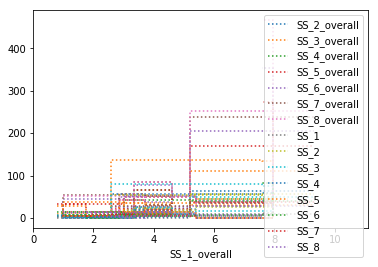

In [29]:
wrc.plot(x='SS_1_overall',drawstyle="steps-mid",linestyle=':')
plt.gca().invert_yaxis()